# Importing Necessary Libraries

In [ ]:
import pandas as pd
from textblob import TextBlob
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from collections import Counter
from PIL import Image

# Loading the CSV File

In [ ]:
file_path = 'newData.csv'
data = pd.read_csv(file_path)
data.head()

,created_at,company,text,polarity
0,2020-10-05 08:44:25,Nvidia,#NVIDIA #GauGAN is actually a good tool to pra...,0.4404
1,2020-10-05 08:44:03,Nvidia,"#BullSequana X2415, the first #supercomputer b...",0.0000
2,2020-10-05 08:41:35,Nvidia,I'm going to attend GTC 2020 tonight! Excited....,0.4003
3,2020-10-05 08:28:11,Nvidia,#NVIDIA delays launch of #GeForce RTX 3070 unt...,0.0000
4,2020-10-05 08:18:05,Nvidia,"#BullSequana X2415, the first #supercomputer b...",0.0000


# Clean the data


In [ ]:
data.dropna(subset=['text', 'company', 'created_at'], inplace=True)

# Convert company names to lowercase
data['company'] = data['company'].str.lower()

# Ensure 'created_at' is a datetime column
data['created_at'] = pd.to_datetime(data['created_at'])
data.tail()

,created_at,company,text,polarity
266090,2020-10-03 23:54:59,youtube,New vlog arrivals! Discover a lovely culture t...,0.9167
266091,2020-10-03 23:54:54,youtube,New Video is up. Finally showing my new Stream...,0.3182
266092,2020-10-03 23:54:53,youtube,NEW VIDEO!! FRIEND v FRIEND CHALLENGE!! ht...,0.9015
266093,2020-10-03 23:54:45,youtube,‼️NEW VIDEO‼️ Films inspired by Jodorowskys Du...,0.5411
266094,2020-10-03 23:54:30,youtube,‼️NEW VIDEO‼️ Films inspired by Jodorowskys Du...,0.5411


# Define a function to calculate polarity


In [ ]:
def calculate_polarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
data['polarity'] = data['text'].apply(calculate_polarity)

# Function to get sentiment analysis summary for a specified company


### 1. Function to plot sentiment analysis summary for a specified company


In [ ]:
def plot_sentiment_summary(company_name):
    # Filter data for the specified company
    company_data = data[data['company'] == company_name.lower()]

    if company_data.empty:
        print(f"No data available for {company_name}.")
        return

    # Group by date and calculate average polarity
    company_data_grouped = company_data.groupby(company_data['created_at'].dt.date).mean().reset_index()

    # Plotting the sentiment trend over time
    plt.figure(figsize=(10, 5))
    plt.plot(company_data_grouped['created_at'], company_data_grouped['polarity'], marker='o', linestyle='-', color='b')
    plt.title(f"Sentiment Trend for {company_name.capitalize()}")
    plt.xlabel("Date")
    plt.ylabel("Average Sentiment Polarity")
    plt.grid(True)
    plt.show()

### 2. Top Words Excluding Common Words Function

In [ ]:
def generate_exclusive_word_cloud(company_name, common_words=set()):
    company_data = data[data['company'] == company_name.lower()]

    if company_data.empty:
        print(f"No data available for {company_name}.")
        return

    text = ' '.join(company_data['text']).lower()
    words = text.split()
    words = [word for word in words if word not in common_words]
    word_freq = Counter(words)
    wordcloud = WordCloud(width = 800, height = 400, background_color ='black').generate_from_frequencies(word_freq)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Exclusive Word Cloud for {company_name.capitalize()}")
    plt.show()

# Example usage


Enter the company name for analysis: youtube


<ipython-input-96-2a9752fc3ba7>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  company_data_grouped = company_data.groupby(company_data['created_at'].dt.date).mean().reset_index()


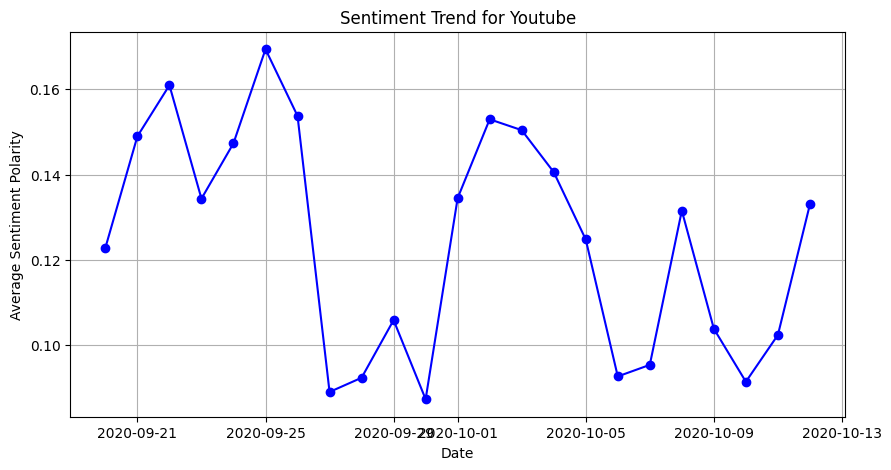

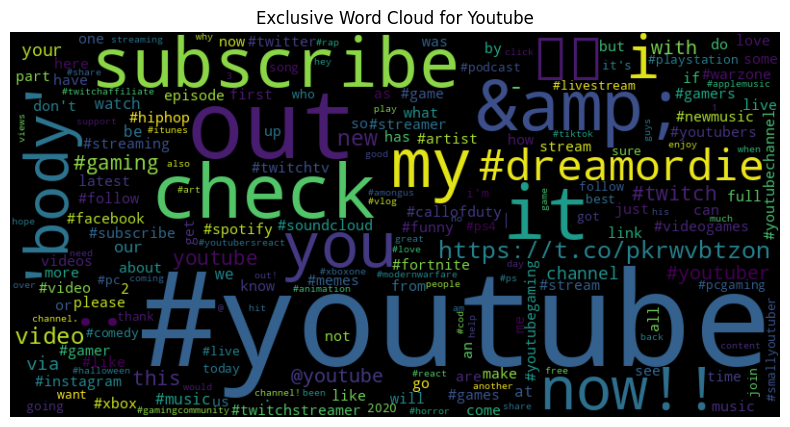

In [ ]:
company_name = input("Enter the company name for analysis: ")
plot_sentiment_summary(company_name)
generate_exclusive_word_cloud(company_name, {'the', 'and', 'to', 'of', 'a', 'in', 'for', 'on', 'is', 'that'})